This notebook contains code for simulating the spread of a disease according to a discrete version of a SIR model.

In [1]:
##%matplotlib widget
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
from simEpi import simepi

Just test if all these libraries were actually available. 

In [ ]:
##plt.plot(np.random.random(25))
##plt.show()

Now we try to simulate some disease spread.

In [2]:
arr,sval,ival,rval,fval=simepi(150,150,nsteps=20,ninit=5,stoi=0.1,itor=0.1)

<IPython.core.display.Javascript object>


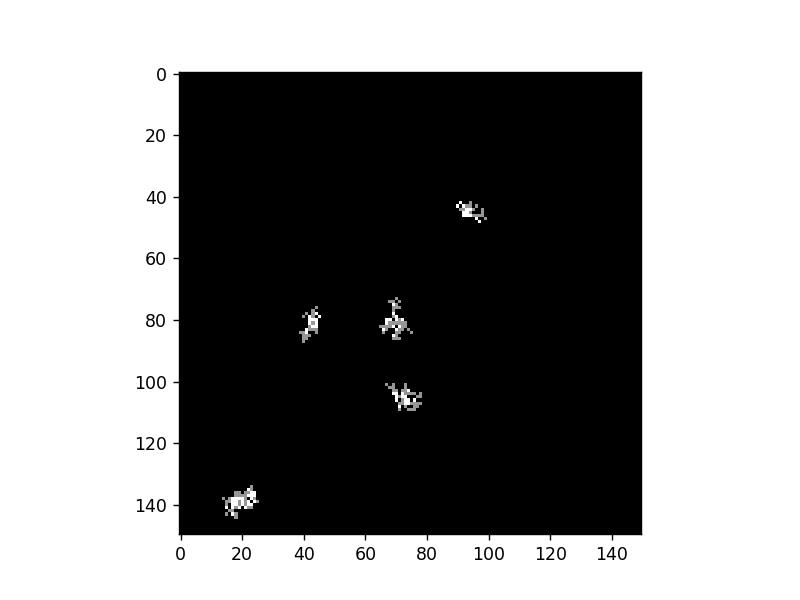

In [3]:
## plot the data
##fig=plt.figure(figsize=(10,10))
fig=plt.figure()
frames=[]
for i in range(len(arr)):
    frames.append([plt.imshow(arr[i], cmap=cm.Greys_r,animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,repeat_delay=10)

In [ ]:
from IPython.display import HTML
from IPython.display import display
##HTML(ani.to_html5_video())
display(HTML(ani.to_jshtml()))